In [40]:
#1 Задание
from sklearn import datasets
from scipy import stats
iris = datasets.load_iris().data
for i in range(1,5):
    test = iris[::,i-1:i:];
    result = stats.shapiro(test)
    if(result[1]>0.05):
        print 'Hypotesis ',i,' accepted ',result

Hypotesis  2  accepted  (0.9837920665740967, 0.07518772780895233)


In [36]:
#2 Задание
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp

for i in range(15,31,5):
    norm = stats.norm.rvs(loc=i, scale=i**0.5, size=200)
    chi2 =np.random.chisquare(df=i,size=200)
    result = stats.ks_2samp(norm,chi2)
    print_res=["single","non single"][result[1]>0.05]
    print print_res,' distribution and p_value = ',result[1],' on i=',i


single  distribution and p_value =  0.005304070449288422  on i= 15
single  distribution and p_value =  0.014428227026410239  on i= 20
single  distribution and p_value =  0.026709183504449206  on i= 25
non single  distribution and p_value =  0.16675112018536087  on i= 30


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.


In [26]:
#3 Задание
import pandas as pd
import numpy as np
from math import log10
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('allcountries.txt', sep='\t',na_values='str')
df = df.dropna()
tuples = [tuple(x) for x in df.values]
arr = np.ones((len(df),2),dtype = float);
for i in range(len(tuples)):
    arr[i][0]=log10(log10(tuples[i][1]))#population
    arr[i][1]=log10(log10(tuples[i][2]))#area

#plt.plot(arr[::,1:2:],arr[::,:1:],"ro")


In [25]:
import statsmodels.api as sm
from scipy.stats import ks_2samp
X = arr[::,1:2:];
#plt.plot(X,arr[::,:1:],"ro")
lmRegModel = sm.OLS(sm.add_constant(X),arr[::,:1:])
result = lmRegModel.fit()
test_arr = np.random.random(len(arr))
y_arr = result.predict(test_arr)[::,1:2:]
result = stats.ks_2samp(X[:, 0],y_arr[:, 0])
#plt.hist(X[:, 0])
#plt.hist(y_arr[:, 0])
print_res=["single","non single"][result[1]>0.05]
print print_res,' distribution and p_value = ',result[1]

single  distribution and p_value =  1.616451547376388e-29


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


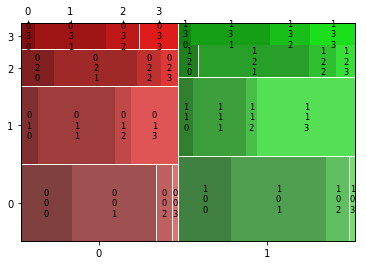

Hair color does not depend  on eye color


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


7.014013157014532e-19

In [22]:
#4 Задание
import numpy as np
import xarray
from scipy import stats
%matplotlib inline
#https://github.com/pydata/xarray/issues/779
# data :
data = np.array([32, 53, 10, 3, 11, 50, 10, 30, 10, 25, 7, 5, 3, 15, 7, 8,
                 36, 66, 16, 4,  9, 34,  7, 64,  5, 29, 7, 5, 2, 14, 7, 8])

_dim = (4, 4, 2)
data = data.reshape(_dim[::-1])

_dims = ['Hair', 'Eye', 'Sex']
_coords = [['Black', 'Brown', 'Red', 'Blond'], 
           ['Brown', 'Blue', 'Hazel', 'Green'],
           ['Male', 'Female']]

data = xarray.DataArray(
    data, dims=_dims[::-1],
    coords=_coords[::-1], name='Number'
)

#assert int(data.loc['Female', 'Green', 'Black']) == 2
#test
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data)
plt.show()
#stats.chisquare(data.loc['Female'])
print_res=["depends","does not depend"][stats.chi2_contingency(data.loc['Female'])[1]<0.05]
print 'Hair color',print_res,' on eye color'
#p-value ,[0]-test [2]-df
stats.chi2_contingency(data.loc['Female'])[1]

In [19]:
#5 Задание
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv('readingspeed.txt', sep=' ')
DRA=[];
SC=[];
for i in df.values:
    if(i[1]=='DRA'):
        DRA.append(i[0])
    else:
        SC.append(i[0])

result = stats.ttest_ind(DRA,SC)
print_res=["does not depend","depends"][result[1]>0.05]
print 'p-value - ',result[1],'The read speed ',print_res,' on the reading technique'
print 'alternative ',1-result[1]/2


p-value -  0.028629482832245753 The read speed  does not depend  on the reading technique
alternative  0.9856852585838771


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  app.launch_new_instance()
